In [2]:
import pandas as pd

df_train=pd.read_csv("preliminary_features.csv")

In [5]:
# Import library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate the target variable 'AdoptionSpeed from the features
predictor_variables = ['Age', 'Vaccinated', 'Type', 'VDSCombination', 'FurLength',
                       'num_checkpoints', 'Contrast', 'Correlation', 'Gender',
                       'SentimentScore', 'Color1', 'TotalVisualMedia', 'PhotoAmt']
target_variable = ['AdoptionSpeed']

x = df_train[predictor_variables]
y = df_train[target_variable]

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transforming "x_train"
x_train = scaler.fit_transform(x_train)

# Transforming "x_test"
x_test = scaler.transform(x_test)

pd.DataFrame(x_train,columns=predictor_variables).head()

,Age,Vaccinated,Type,VDSCombination,FurLength,num_checkpoints,Contrast,Correlation,Gender,SentimentScore,Color1,TotalVisualMedia,PhotoAmt
0,-0.370902,0.468319,-0.961422,0.364292,-0.76759,0.787709,-0.019874,-0.236922,-1.171434,0.195129,-0.688265,0.645129,0.169157
1,0.901638,0.468319,-0.961422,0.349832,0.92954,0.987606,2.560029,-2.671266,-1.171434,-0.863631,0.489512,0.142788,0.169157
2,-0.431499,0.468319,-0.961422,0.508897,-0.76759,-0.098041,-0.567469,0.661889,-1.171434,-0.813094,-0.688265,-0.359554,-0.349560
3,-0.431499,-1.091102,-0.961422,-1.081760,0.92954,-0.670159,-0.527923,0.535995,0.229023,1.373584,1.667288,-0.359554,-0.349560
4,-0.431499,-1.091102,-0.961422,-0.937155,-0.76759,0.038096,-0.419506,0.623259,0.229023,-0.342775,-0.688265,-0.359554,-0.349560


## Model 1: Decision Tree Classifier

In [6]:
# Create and train using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import mlflow
from mlflow import MlflowClient



client = MlflowClient(tracking_uri="http://127.0.0.1:8080")
mlflow.set_tag('mlflow.runName', 'Simple Decisition tree')

mlflow.autolog() 
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)

model.fit(x_train, y_train)
y_pred_decision_tree = model.predict(x_test)

# Evaluate the accuracy score
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
acc_decision_tree



2023/12/03 14:54:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/12/03 14:54:41 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023/12/03 14:54:42 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: too many indices for array: array is 2-dimensional, but 3 were indexed
2023/12/03 14:54:56 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib

0.36749742768949356

In [7]:
import mlflow
from mlflow import MlflowClient
mlflow.set_tag('mlflow.runName', 'Decisition tree with gridsearch')

from sklearn.model_selection import GridSearchCV

mlflow.autolog() 

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model = DecisionTreeClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_decision_tree = best_model.predict(x_test)

# Evaluate the accuracy score
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
acc_decision_tree


2023/12/03 14:55:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/12/03 14:55:26 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2023/12/03 14:56:11 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: too many indices for array: array is 2-dimensional, but 3 were indexed
2023/12/03 14:56:30 INFO mlflow.sklearn.utils: Logging the 5 best runs, 85 runs will be omitted.


0.4607293929347205

In [10]:
mlflow.end_run()

In [13]:
import mlflow
from mlflow import MlflowClient
mlflow.set_tag('mlflow.runName', 'Decisition tree with gridsearch')
mlflow.start_run(nested=True)
from sklearn.model_selection import GridSearchCV

mlflow.autolog() 

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [15,20,25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model = DecisionTreeClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_decision_tree = best_model.predict(x_test)

# Evaluate the accuracy score
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
acc_decision_tree

2023/12/03 15:11:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/12/03 15:11:14 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
2023/12/03 15:12:09 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: too many indices for array: array is 2-dimensional, but 3 were indexed
2023/12/03 15:12:26 INFO mlflow.sklearn.utils: Logging the 5 best runs, 49 runs will be omitted.


0.782782668343432

In [23]:
mlflow.end_run()

## Model 2: Random Forest

In [24]:
#mlflow.set_tag('mlflow.runName', 'Random forest')
#mlflow.start_run(nested=True)

from sklearn.ensemble import RandomForestClassifier


mlflow.start_run(run_name="Random_forest_grid_search")
mlflow.autolog(log_models=False) 
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier()

# Create GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(x_train, y_train)

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Make predictions with the best model
y_pred_random_forest = best_model_rf.predict(x_test)

mlflow.end_run()

2023/12/03 15:38:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/12/03 15:38:26 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023/12/03 15:40:45 WARNING mlflow.sklearn.utils: roc_auc_score failed

In [25]:
#mlflow.set_tag('mlflow.runName', 'Random forest')
#mlflow.start_run(nested=True)

from sklearn.ensemble import RandomForestClassifier


mlflow.start_run(run_name="Random_forest_grid_search2")
mlflow.autolog(log_models=False) 
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [20, 50, 80],
    'criterion': ['gini', 'entropy'],
    'max_depth': [7,10,14],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier()

# Create GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(x_train, y_train)

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Make predictions with the best model
y_pred_random_forest = best_model_rf.predict(x_test)

mlflow.end_run()

2023/12/03 15:43:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/12/03 15:43:12 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'
c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
2023/12/03 16:02:23 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: too many indices for array: array is 2-dimensional, but 3 were indexed
2023/12/03 16:02:26 INFO mlflow.sklearn.utils: Logging the 5 best runs, 157 runs will be omitted.


In [ ]:
RF_BEST_PARAMS = {
                    # 'n_jobs' : -1,
                    'bootstrap': True,
                    'max_depth': 120,
                    'min_samples_leaf': 3,
                    'min_samples_split': 8,
                    'n_estimators': 200
                }


GRIDCV_PARAM  = {
     
        'classifier__bootstrap': [True],  # Method of selecting samples for training each tree
        'classifier__max_depth': [120, 140, 150, 160],  # Maximum number of levels in tree
        'classifier__min_samples_leaf': [3, 4, 5],  # Minimum number of samples required at each leaf node
        'classifier__min_samples_split': [8, 10, 12],  # Minimum number of samples required to split a node
        'classifier__n_estimators': [100, 200, 300]  # Number of trees in random forest
    }

In [ ]:
#Explainability using SHAP
import shap
# Create a SHAP explainer using TreeExplainer
explainer = shap.TreeExplainer(best_model_rf)

# Calculate SHAP values for all instances in the test set
shap_values = explainer.shap_values(x_test)



In [ ]:
X_test_column_names=pd.DataFrame(x_test, columns=)

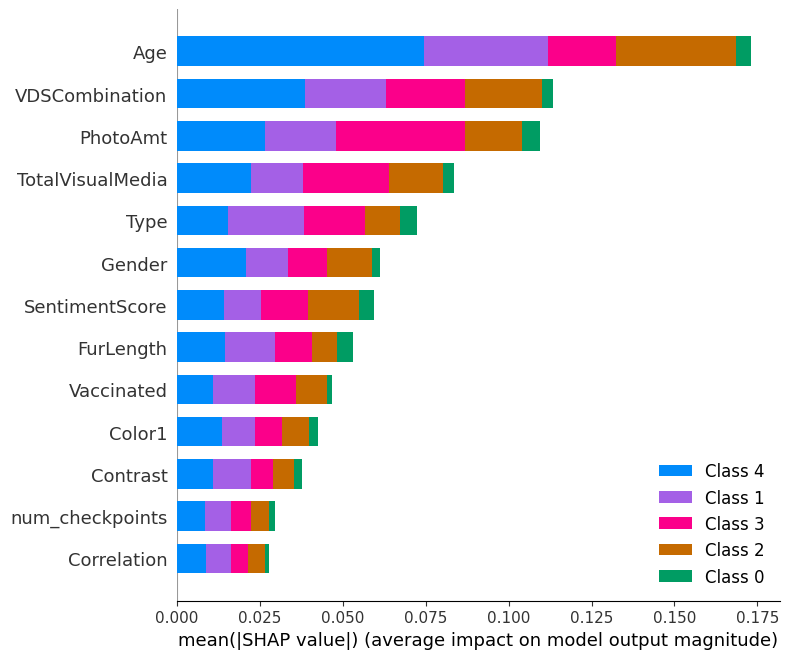

In [34]:
# Summary plot for feature importance
shap.summary_plot(shap_values, x_test, feature_names=x.columns)

In [ ]:
shap.dependence_plot('Feature_Name', shap_values, x_test)


In [39]:
import numpy as np
np.save("shap_values.npy",shap_values)
shap_values = np.load("shap_values.npy")

In [41]:
shap_values.shape

AttributeError: 'list' object has no attribute 'shape'

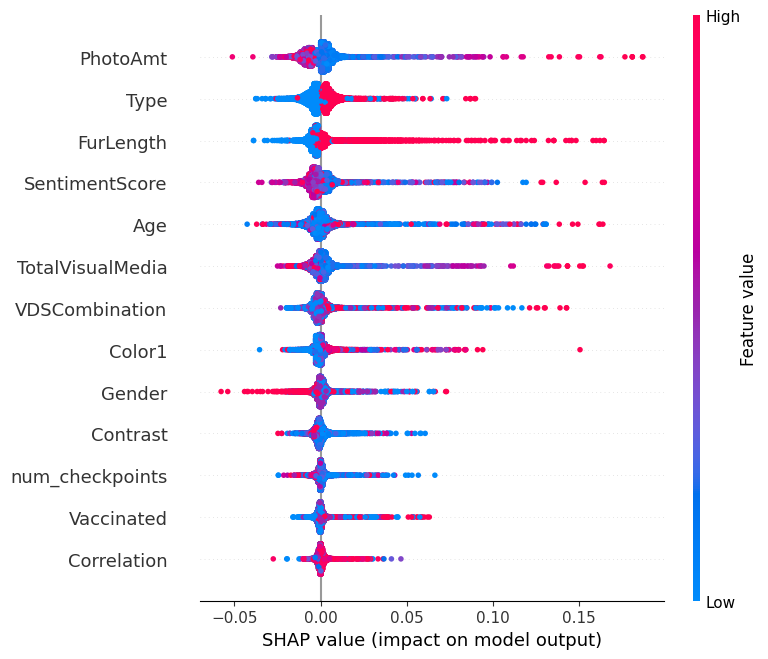

In [50]:
shap.summary_plot(shap_values[0], x_test,feature_names=x.columns)

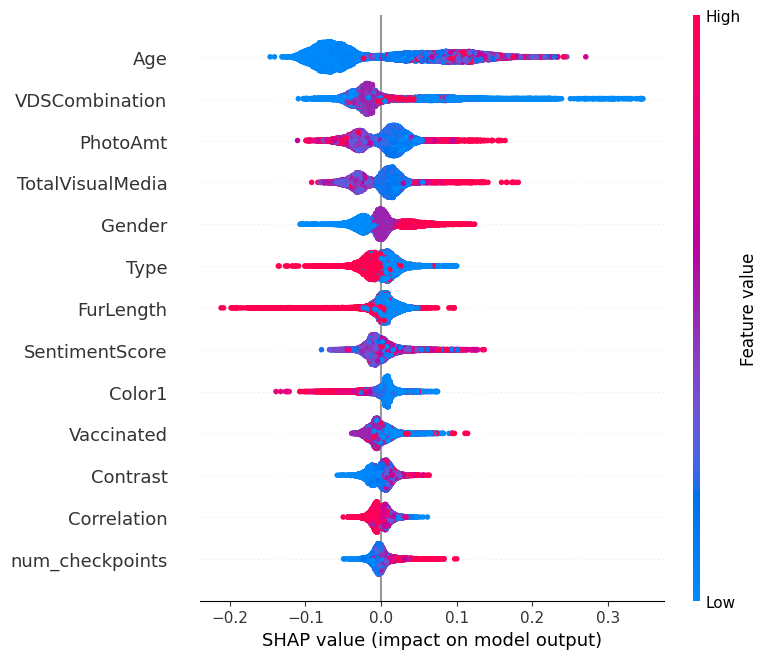

In [46]:
shap.summary_plot(shap_values[4], x_test,feature_names=x.columns)